# Experiment with Regression Models

In this notebook, we will use a few of the regression models to look at the relationship between features of a bike rentals dataset. In the second part, we will create a preprocessing pipeline and tune the hyperparameters for a single model.

In [2]:
import urllib.request
import pandas as pd

url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv"

# Download the file
urllib.request.urlretrieve(url, "daily-bike-share.csv")

# Assuming the file is downloaded correctly
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
# Get day from the date
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


## Exploratory Data Analysis

In [4]:
# Get numeric features in a list and describe the dataframe
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


From this, we can see that the mean number of daily rentals is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day

/var/folders/pj/3fn1xxdn4cz7gfp1g7pnb3dm0000gn/T/ipykernel_37573/2229708211.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


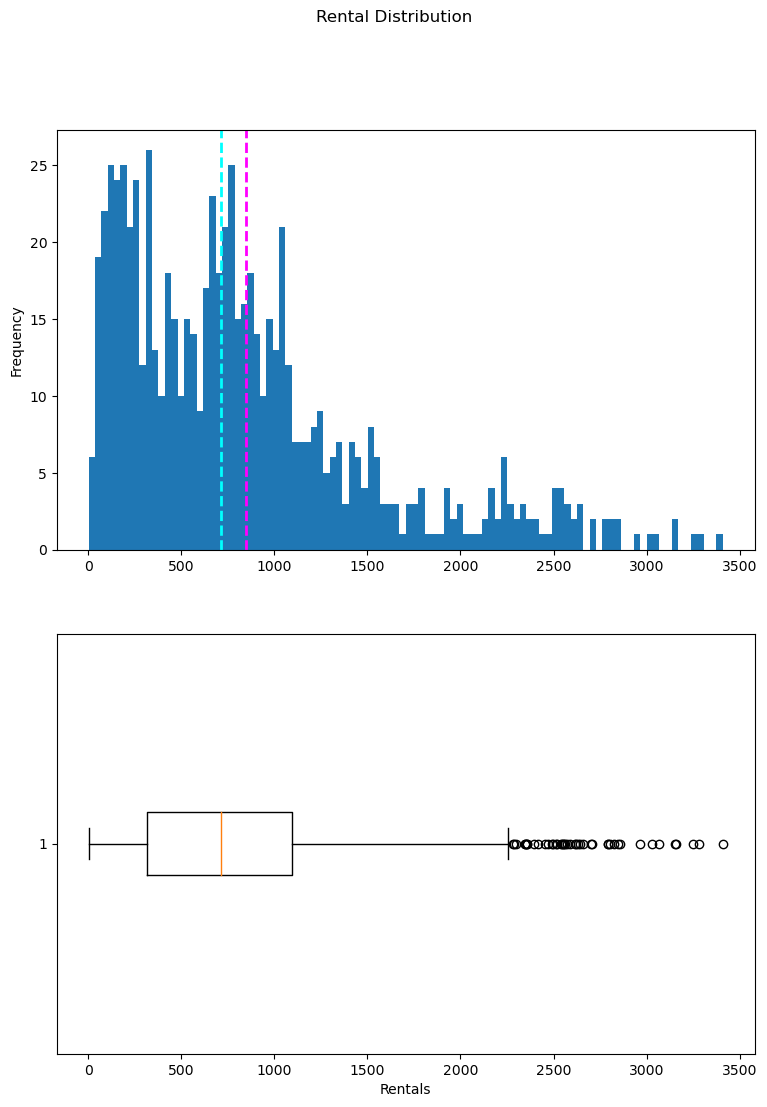

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


/var/folders/pj/3fn1xxdn4cz7gfp1g7pnb3dm0000gn/T/ipykernel_37573/2348966882.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


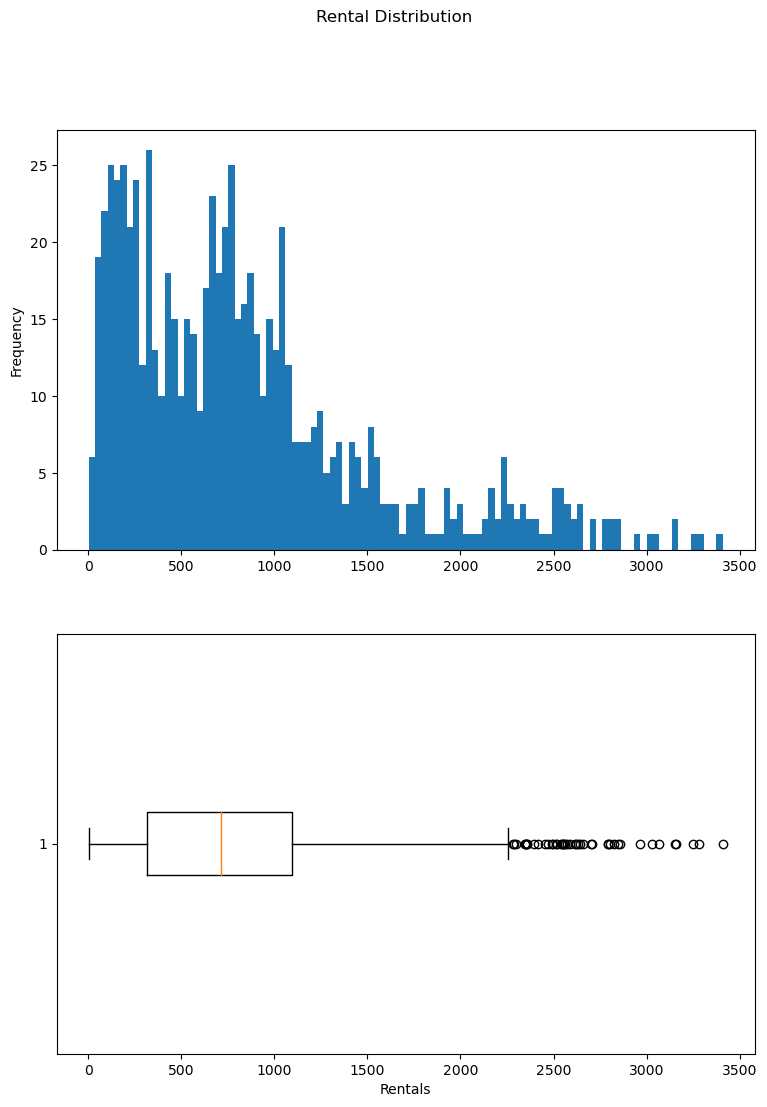

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get label col
label = bike_data['rentals']

# Create 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Plot boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add title
fig.suptitle('Rental Distribution')

fig.show()

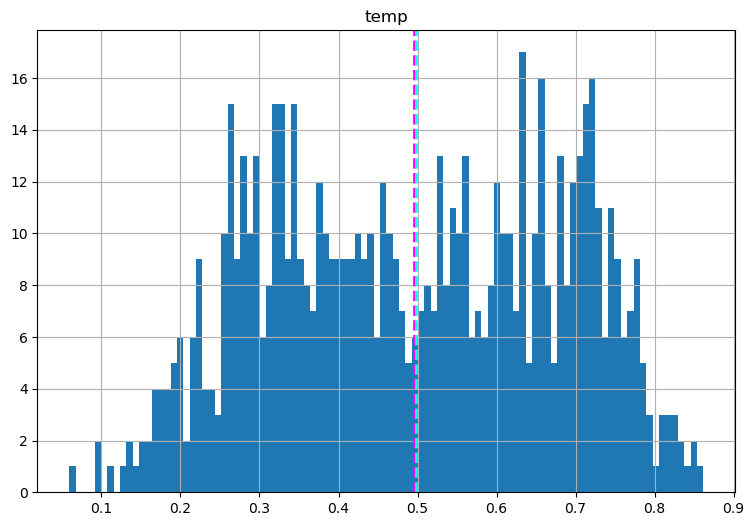

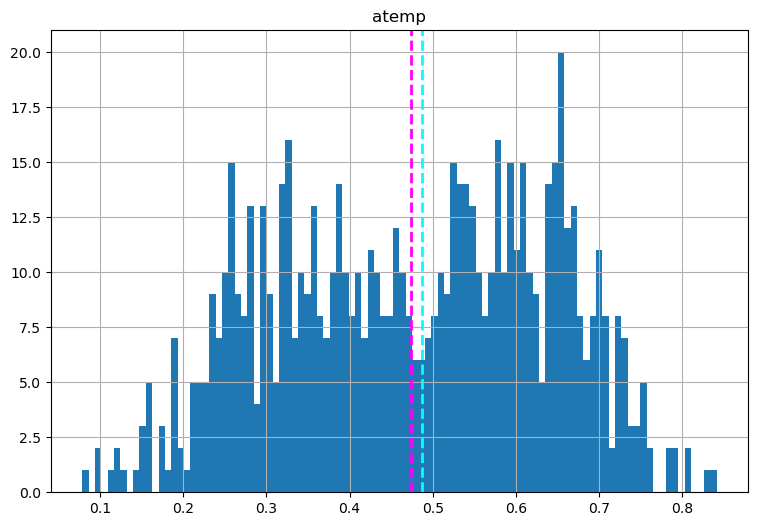

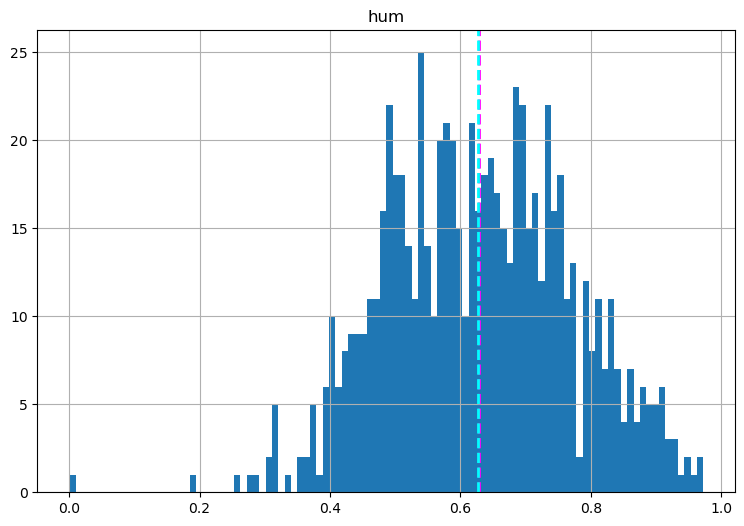

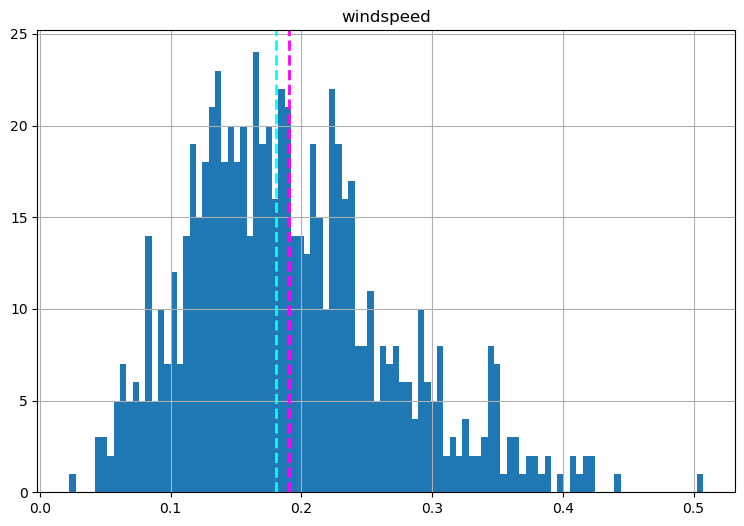

In [7]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

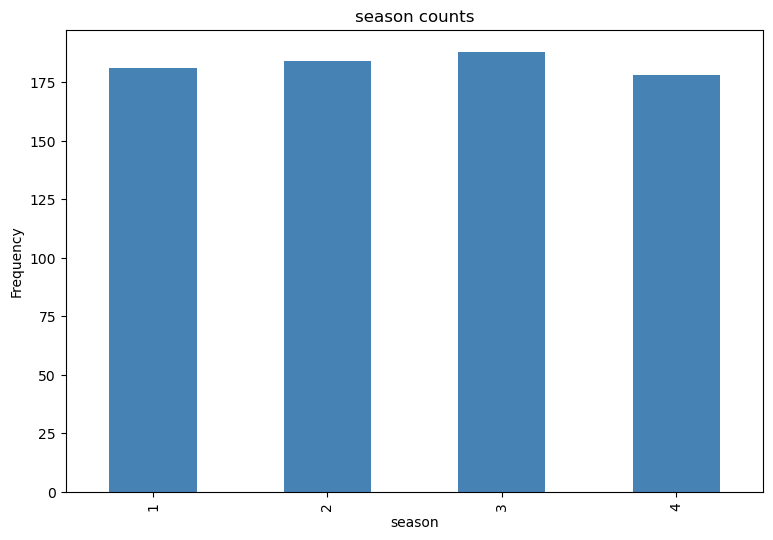

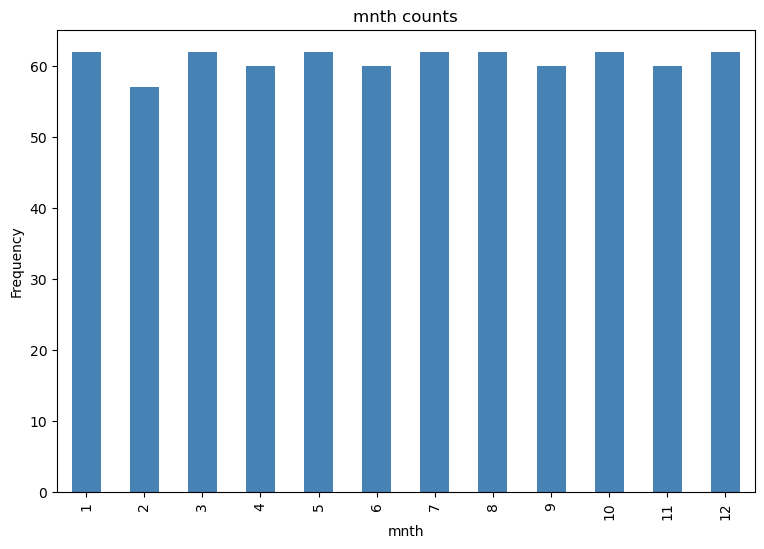

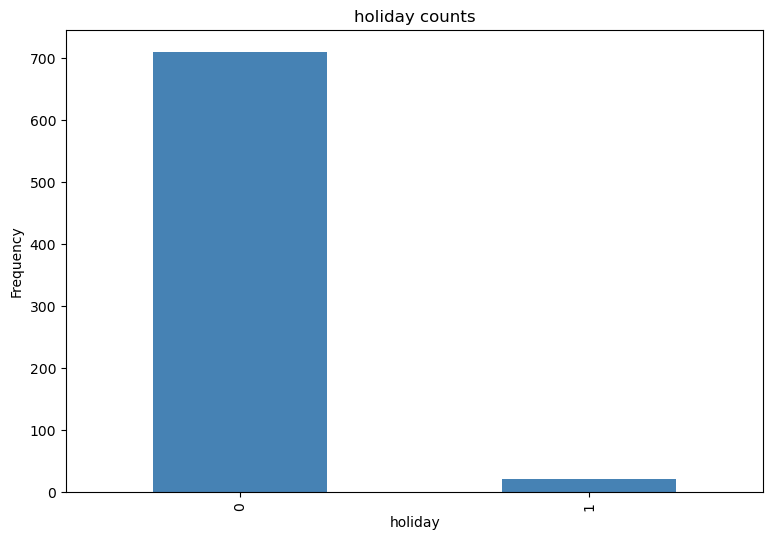

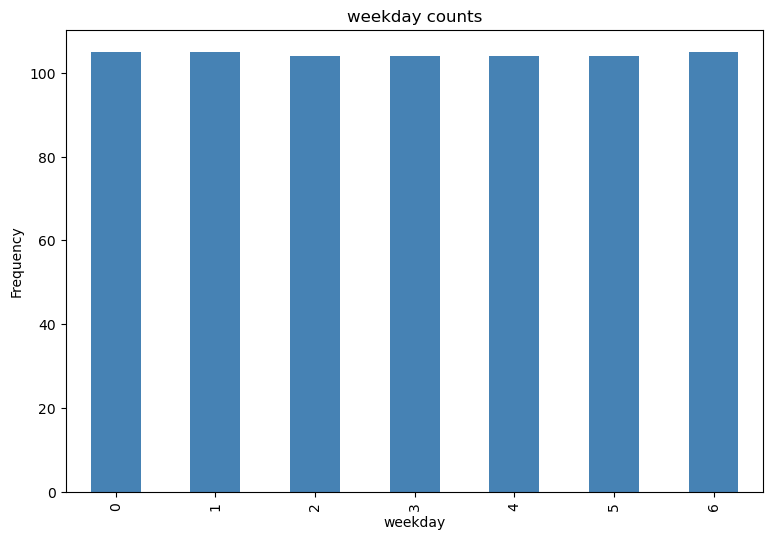

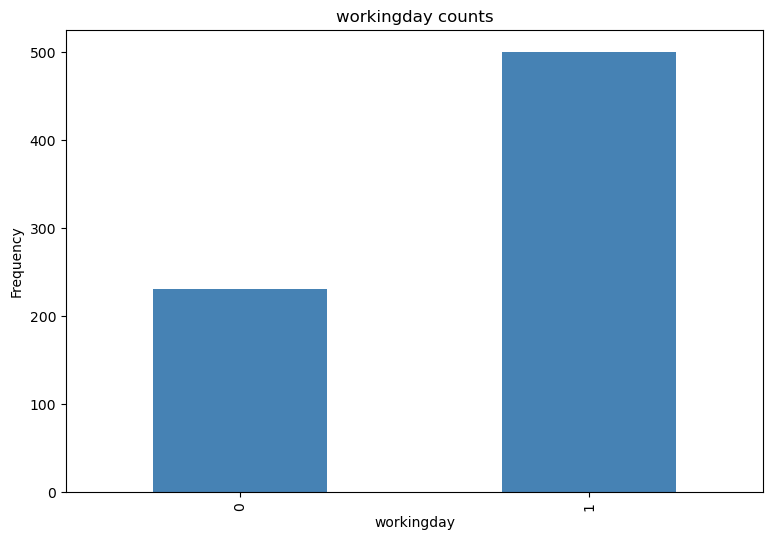

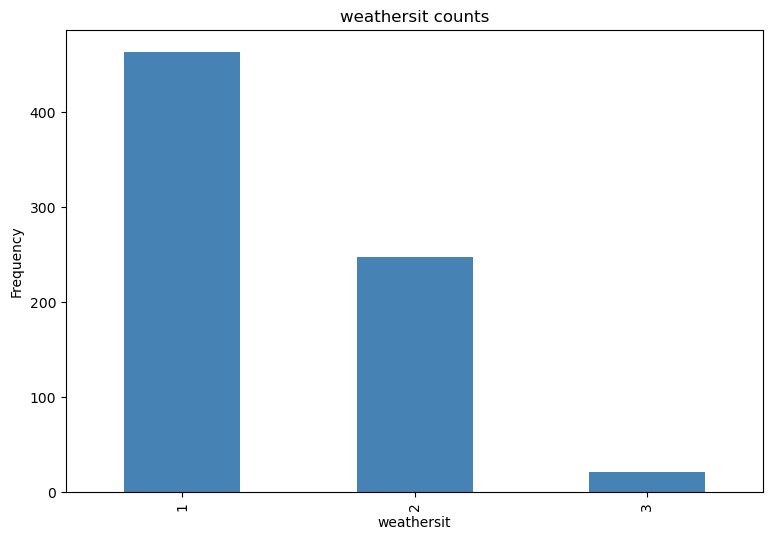

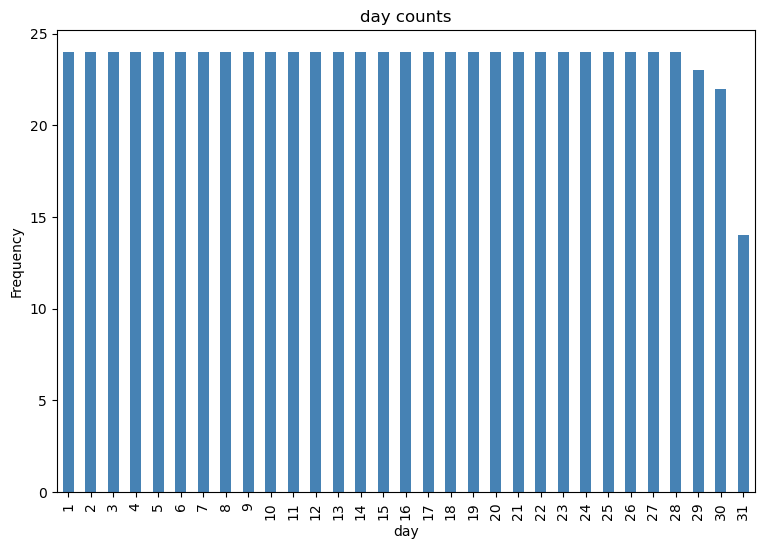

In [8]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    # Get counts for each of the categorical values
    counts = bike_data[col].value_counts().sort_index()

    # Plot the categorical values
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict.
For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship.

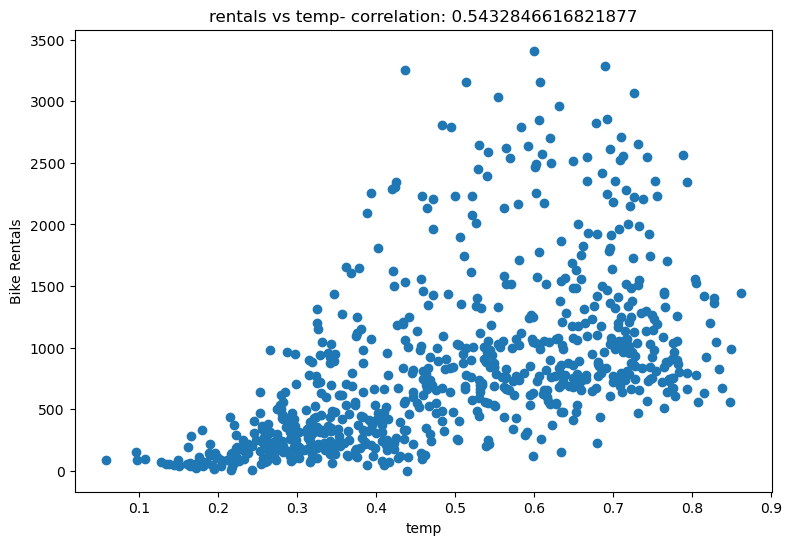

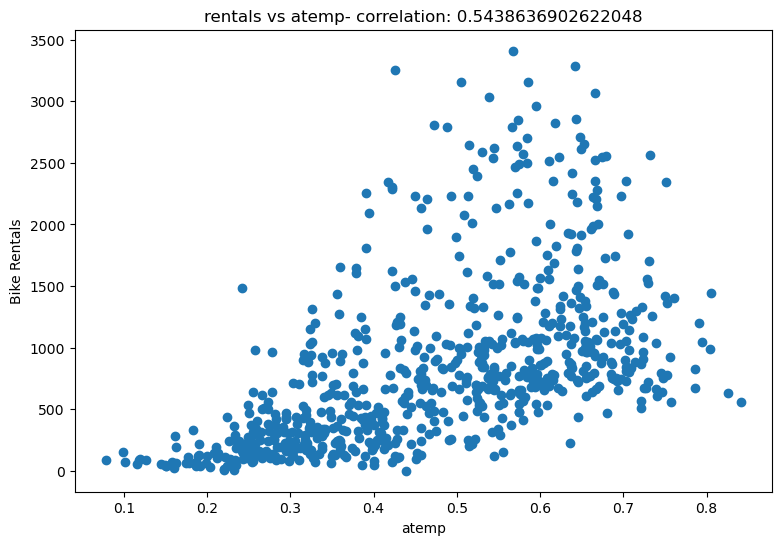

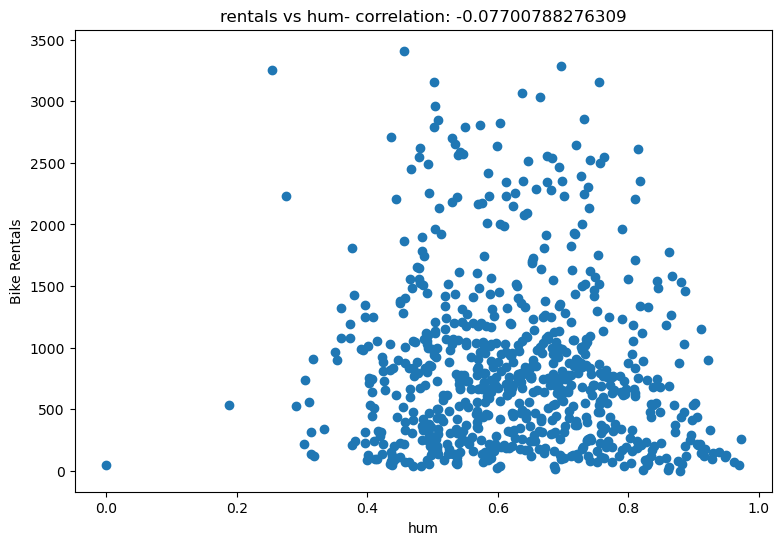

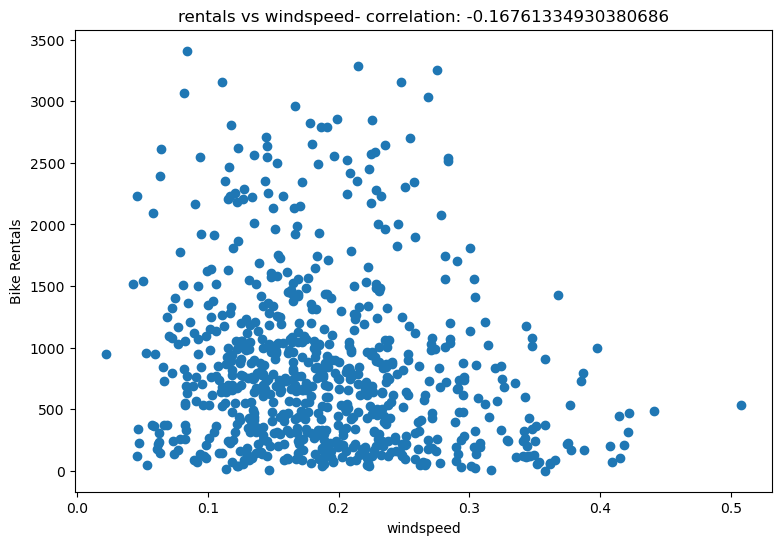

In [9]:
# Create scatter plot for numerical features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


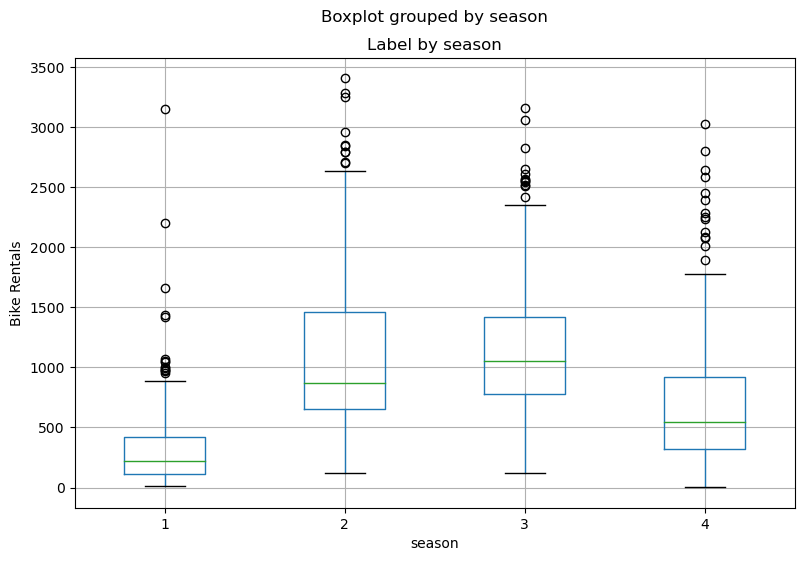

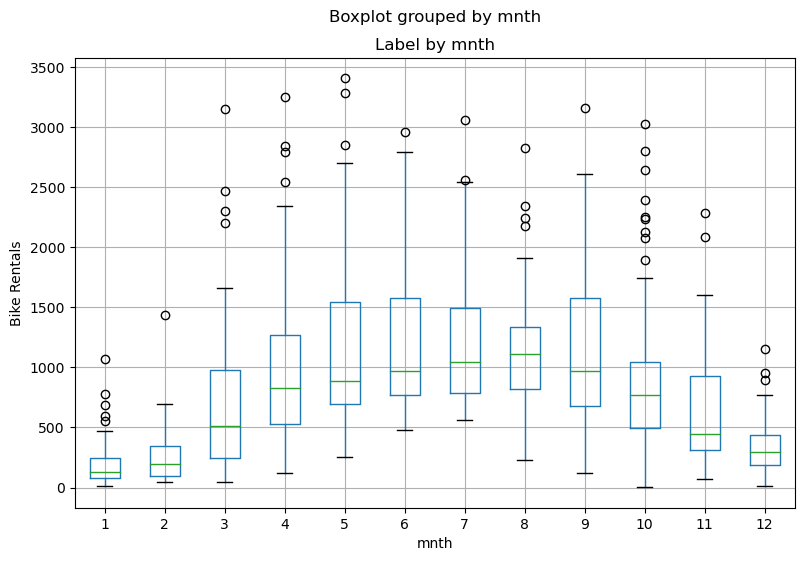

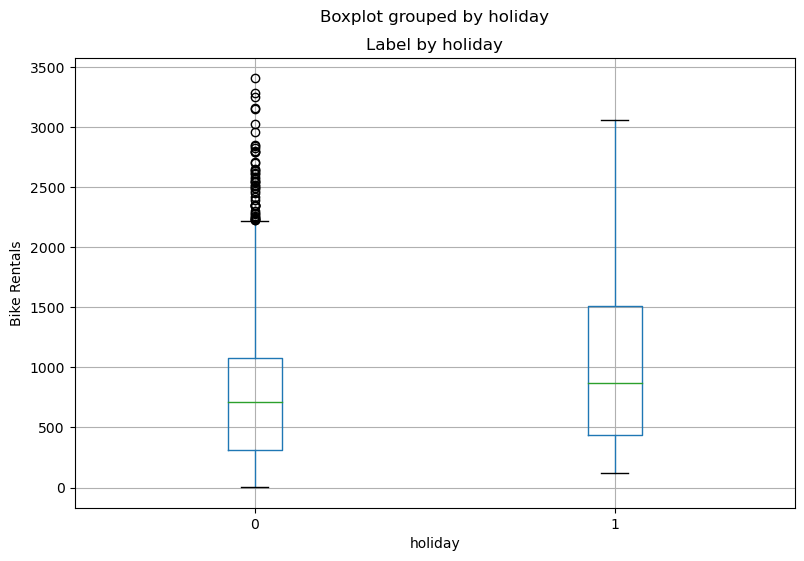

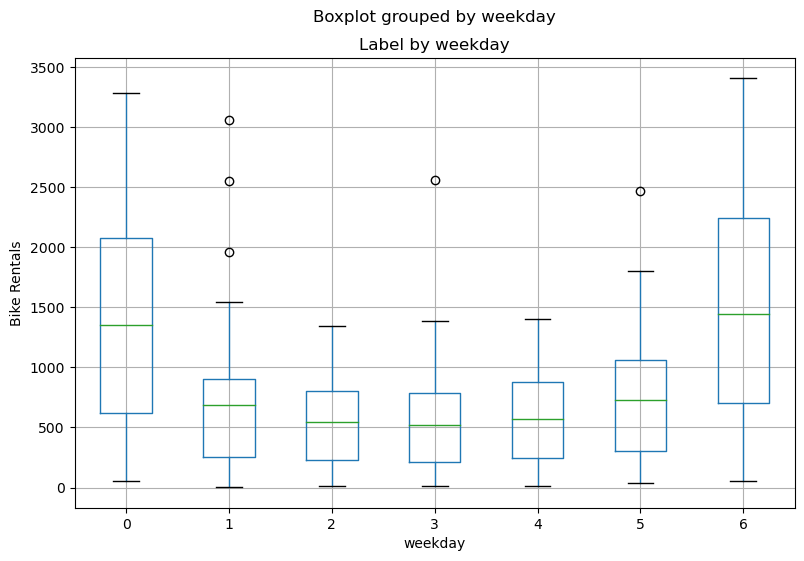

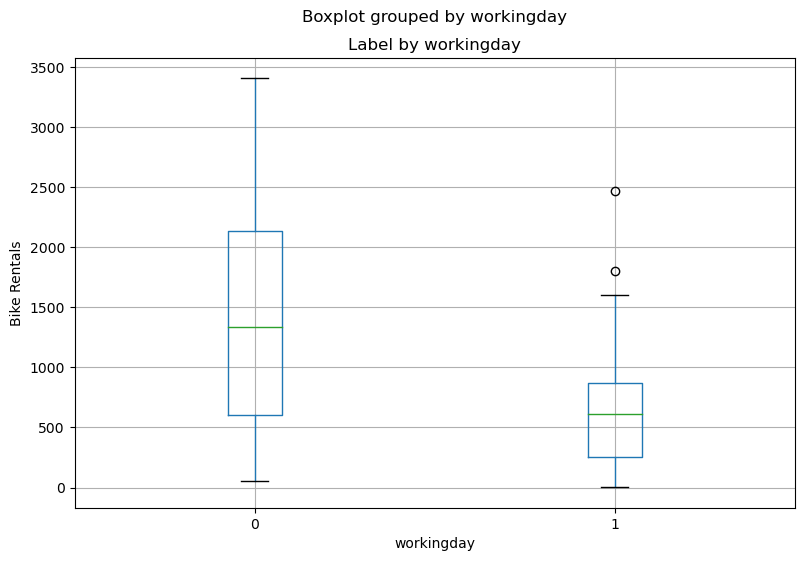

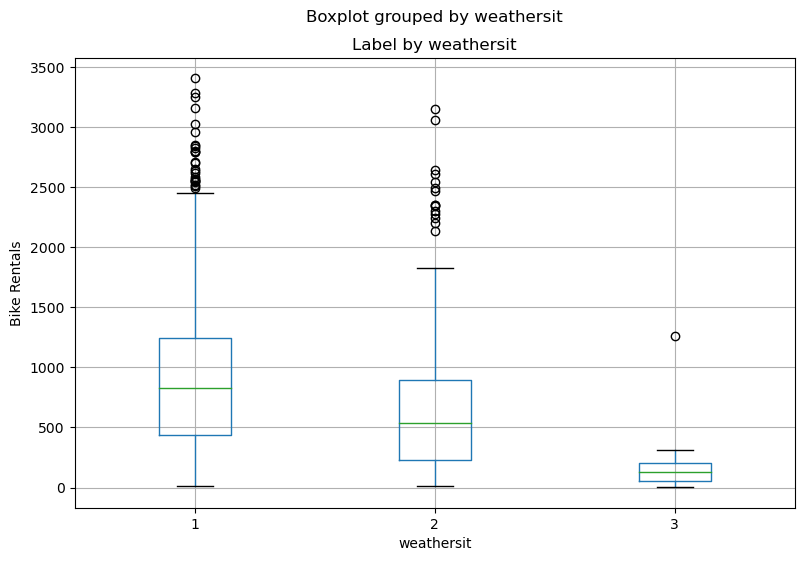

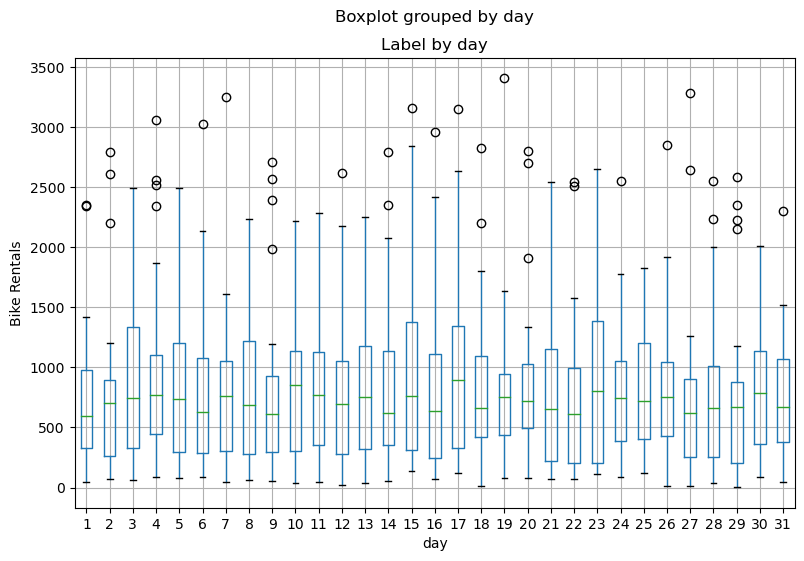

In [10]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

## Model training

In [11]:
# Separate features and labels
cols_to_keep = ['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']
X = bike_data[cols_to_keep].values
y = bike_data['rentals'].values

print('Features:',X[:5], '\nLabels:', y[:5], sep='\n')

Features:
[[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]
 [1.       1.       0.       2.       1.       1.       0.2      0.212122
  0.590435 0.160296]
 [1.       1.       0.       3.       1.       1.       0.226957 0.22927
  0.436957 0.1869  ]]

Labels:
[331 131 120 108  82]


In [12]:
# Split data into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Training Set : {len(X_train)} rows \nTest Set : {len(X_test)} rows")

Training Set : 511 rows 
Test Set : 220 rows


## Helper Functions for model training and evaluation

In [13]:
# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

def train_model(model_obj, X_train, y_train):
    # Model training
    model = model_obj().fit(X_train, y_train)

    return model


def evaluate_model(model, X_test, y_test):
    # Make predictions on test set
    predictions = model.predict(X_test)

    # Create a list of column names
    column_names = ['Actual Rentals', 'Predicted Rentals']

    # Create a DataFrame from the arrays
    df_pred = pd.DataFrame(list(zip(y_test, predictions)), columns=column_names)

    # Calculate Error in prediction
    mse = mean_squared_error(y_true=df_pred['Actual Rentals'], y_pred=df_pred['Predicted Rentals'])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=df_pred['Actual Rentals'], y_pred=df_pred['Predicted Rentals'])

    return df_pred, mse, rmse, r2


def plot_model_predictions(y_test, predictions):
    # Plot actual and predicted values
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title('Daily Bike Share Predictions')

    # overlay the regression line
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()

## Model 1: Linear Regression 

Model Trained: LinearRegression()

Model Metrics
MSE:  156424.8147
RMSE:  395.5058
R2 Score:  0.6125

 ======= Plotting actuals vs predicted rentals ========


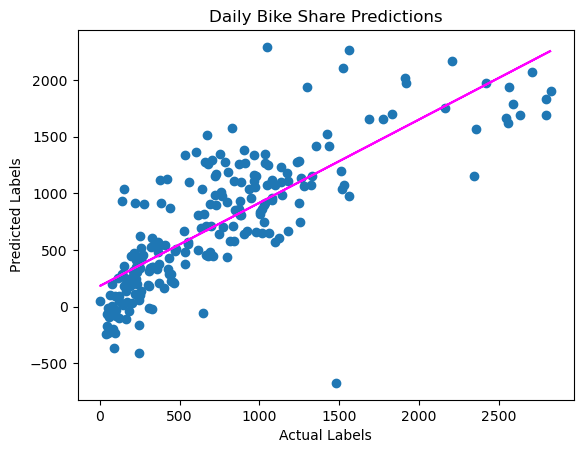

In [14]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model_lr = train_model(LinearRegression, X_train=X_train, y_train=y_train)
print(f"Model Trained: {model_lr}\n")

# Evaluate model
df_pred_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(model_lr, X_test=X_test, y_test=y_test)
print("Model Metrics")
print(f"MSE: {mse_lr : .4f}")
print(f"RMSE: {rmse_lr : .4f}")
print(f"R2 Score: {r2_lr : .4f}")

# Plot model predictions
print("\n ======= Plotting actuals vs predicted rentals ========")
plot_model_predictions(y_test=df_pred_lr['Actual Rentals'], predictions=df_pred_lr['Predicted Rentals'])

## Model 2: Lasso 

Model Trained: Lasso()

Model Metrics
MSE:  142322.5456
RMSE:  377.2566
R2 Score:  0.6474

 ======= Plotting actuals vs predicted rentals ========


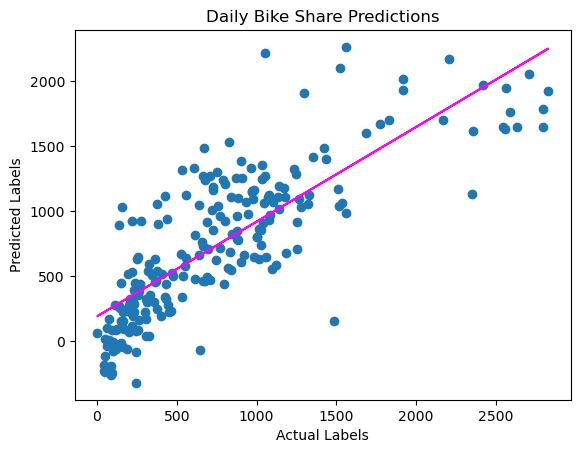

In [15]:
# Train the model
from sklearn.linear_model import Lasso

# Fit a linear regression model on the training set
model_lasso = train_model(Lasso, X_train=X_train, y_train=y_train)
print(f"Model Trained: {model_lasso}\n")

# Evaluate model
df_pred_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(model_lasso, X_test=X_test, y_test=y_test)
print("Model Metrics")
print(f"MSE: {mse_lasso : .4f}")
print(f"RMSE: {rmse_lasso : .4f}")
print(f"R2 Score: {r2_lasso : .4f}")

# Plot model predictions
print("\n ======= Plotting actuals vs predicted rentals ========")
plot_model_predictions(y_test=df_pred_lasso['Actual Rentals'], predictions=df_pred_lasso['Predicted Rentals'])

## Model 3: Decision Tree 

Model Trained: DecisionTreeRegressor()

Model Metrics
MSE:  151966.5273
RMSE:  389.8288
R2 Score:  0.6236

|--- feature_7 <= 0.42
|   |--- feature_7 <= 0.31
|   |   |--- feature_6 <= 0.27
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |--- feature_9 <= 0.26
|   |   |   |   |   |   |   |--- feature_9 <= 0.25
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [150.00]
|   |   |   |   |   |   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [196.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.68
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  1.5

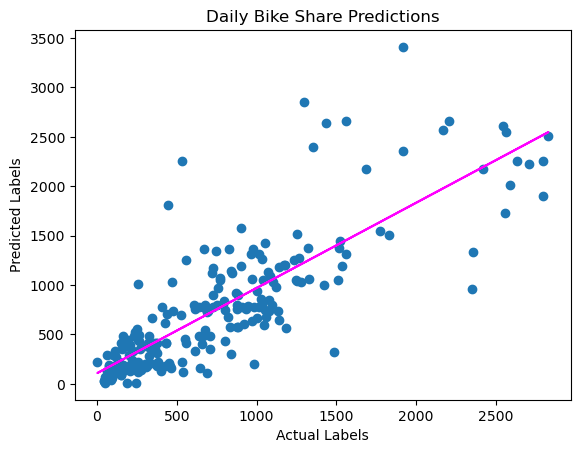

In [16]:
# Train the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Fit a linear regression model on the training set
model_dt = train_model(DecisionTreeRegressor, X_train=X_train, y_train=y_train)
print(f"Model Trained: {model_dt}\n")

# Evaluate model
df_pred_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(model_dt, X_test=X_test, y_test=y_test)
print("Model Metrics")
print(f"MSE: {mse_dt : .4f}")
print(f"RMSE: {rmse_dt : .4f}")
print(f"R2 Score: {r2_dt : .4f}\n")

# Visualize the model tree
tree = export_text(model_dt)
print(tree)

# Plot model predictions
print("\n ======= Plotting actuals vs predicted rentals ========")
plot_model_predictions(y_test=df_pred_dt['Actual Rentals'], predictions=df_pred_dt['Predicted Rentals'])

## Model 4: Ensemble - Random Forest

Model Trained: RandomForestRegressor()

Model Metrics
MSE:  81547.4838
RMSE:  285.5652
R2 Score:  0.7980

 ======= Plotting actuals vs predicted rentals ========


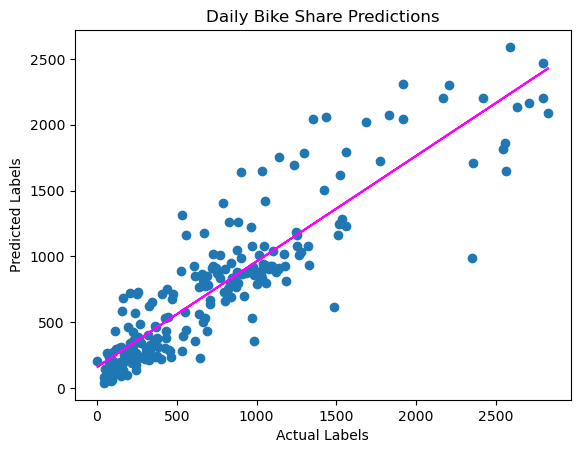

In [17]:
# Train the model
from sklearn.ensemble import RandomForestRegressor

# Fit a linear regression model on the training set
model_rf = train_model(RandomForestRegressor, X_train=X_train, y_train=y_train)
print(f"Model Trained: {model_rf}\n")

# Evaluate model
df_pred_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(model_rf, X_test=X_test, y_test=y_test)
print("Model Metrics")
print(f"MSE: {mse_rf : .4f}")
print(f"RMSE: {rmse_rf : .4f}")
print(f"R2 Score: {r2_rf : .4f}")

# Plot model predictions
print("\n ======= Plotting actuals vs predicted rentals ========")
plot_model_predictions(y_test=df_pred_rf['Actual Rentals'], predictions=df_pred_rf['Predicted Rentals'])

## Model 5: Gradient Boost 

Model Trained: GradientBoostingRegressor()

Model Metrics
MSE:  85619.1531
RMSE:  292.6075
R2 Score:  0.7879

 ======= Plotting actuals vs predicted rentals ========


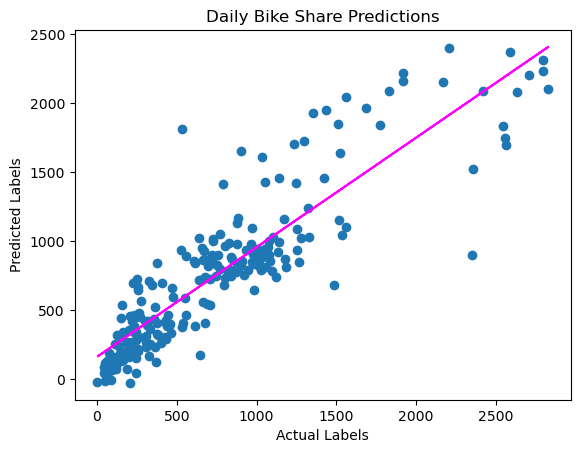

In [18]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a linear regression model on the training set
model_gb = train_model(GradientBoostingRegressor, X_train=X_train, y_train=y_train)
print(f"Model Trained: {model_gb}\n")

# Evaluate model
df_pred_gb, mse_gb, rmse_gb, r2_gb = evaluate_model(model_gb, X_test=X_test, y_test=y_test)
print("Model Metrics")
print(f"MSE: {mse_gb : .4f}")
print(f"RMSE: {rmse_gb : .4f}")
print(f"R2 Score: {r2_gb : .4f}")

# Plot model predictions
print("\n ======= Plotting actuals vs predicted rentals ========")
plot_model_predictions(y_test=df_pred_gb['Actual Rentals'], predictions=df_pred_gb['Predicted Rentals'])

## Optimising the model training - Gradient Boosting

We trained a model with data that we loaded straight from a source file, with only moderately successful results. In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. We will perform a few preprocessing steps

In [19]:
# Import preprocessing packages
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])


#### Hyperparamater tuning using Grid Search (GradientBoostRegressor)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Example grid search parameters
param_grid = {
    'regressor__learning_rate' : [0.1, 0.5, 1.0],
    'regressor__max_depth': [80, 90, 100, 110],
    'regressor__max_features': [2, 3],
    'regressor__min_samples_leaf': [3, 4, 5],
    'regressor__min_samples_split': [8, 10, 12],
    'regressor__n_estimators': [100, 200, 300, 1000],
}

# Create an objective to find the best parameter combination that gives the best R2 score
score = make_scorer(r2_score)

# Perform grid search on the training pipeline
gridsearch = GridSearchCV(pipe, param_grid=param_grid, scoring=score, cv=5, return_train_score=False)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model_gb_tuned=gridsearch.best_estimator_
print(model_gb_tuned, "\n")


Best parameter combination: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 80, 'regressor__max_features': 3, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100} 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=80, max_features=3,
                                   

In [28]:

# Evaluate model
df_pred_gb_tuned, mse_gb_tuned, rmse_gb_tuned, r2_gb_tuned = evaluate_model(model_gb_tuned, X_test=X_test, y_test=y_test)
print("Model Metrics - Before tuning")
print(f"MSE: {mse_gb : .4f}")
print(f"RMSE: {rmse_gb : .4f}")
print(f"R2 Score: {r2_gb : .4f}")

print("\n ======== \n")
print("Model Metrics - After tuning")
print(f"MSE: {mse_gb_tuned : .4f}")
print(f"RMSE: {rmse_gb_tuned : .4f}")
print(f"R2 Score: {r2_gb_tuned : .4f}")

Model Metrics - Before tuning
MSE:  85619.1531
RMSE:  292.6075
R2 Score:  0.7879


Model Metrics - After tuning
MSE:  76643.4901
RMSE:  276.8456
R2 Score:  0.8101
